In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("german_credit_data.csv")

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Text(0, 0.5, 'Count')

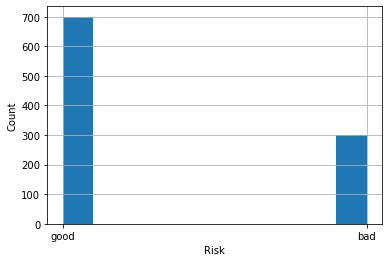

In [4]:
import matplotlib.pyplot as plt
data['Risk'].hist()
plt.xlabel('Risk')
plt.ylabel('Count')

In [5]:
attributes = ['Age',
             'Job',
             'Credit amount',
             'Duration']

x = data[attributes]

y = (data['Risk'] == 'good')

In [6]:
y

0       True
1      False
2       True
3       True
4      False
       ...  
995     True
996     True
997     True
998    False
999     True
Name: Risk, Length: 1000, dtype: bool

In [7]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x,y)

from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x,y)

from sklearn.neighbors import KNeighborsClassifier
clf_neighbors = KNeighborsClassifier()
clf_neighbors.fit(x,y)

from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression()
clf_lg.fit(x,y)

LogisticRegression()

In [8]:
from sklearn import metrics
#Naive Bayes
print(metrics.accuracy_score(y, clf_gnb.predict(x)))
#Decision Tree
print(metrics.accuracy_score(y, clf_tree.predict(x)))
#KNeighbours
print(metrics.accuracy_score(y, clf_neighbors.predict(x)))
#Logistic Regression
print(metrics.accuracy_score(y, clf_lg.predict(x)))


0.71
1.0
0.745
0.712


In [9]:
from sklearn.model_selection import cross_val_score
#Naive Bayes
print(cross_val_score(clf_gnb, x,y, cv = 3, scoring = "accuracy"))

#Decision Tree
print(cross_val_score(clf_tree, x,y, cv = 3, scoring = "accuracy"))

#KNeighbours
print(cross_val_score(clf_neighbors, x,y, cv = 3, scoring = "accuracy"))

#Logistic Regression
print(cross_val_score(clf_lg, x,y, cv = 3, scoring = "accuracy"))


[0.70958084 0.6996997  0.6996997 ]
[0.5988024  0.61261261 0.64264264]
[0.62874251 0.64864865 0.65165165]
[0.70658683 0.6966967  0.70870871]


In [10]:
from sklearn.model_selection import cross_val_predict

clf_gnb_pred = cross_val_predict(clf_gnb, x, y ,cv = 3)
clf_tree_pred = cross_val_predict(clf_tree, x, y ,cv = 3)
clf_neighbors_pred = cross_val_predict(clf_neighbors, x, y ,cv = 3)
clf_lg_pred = cross_val_predict(clf_lg, x, y ,cv = 3)


In [11]:
from sklearn.metrics import confusion_matrix
#Naive Bayes
print(confusion_matrix(y, clf_gnb_pred))

#Decision Tree
print(confusion_matrix(y, clf_tree_pred))

#KNN
print(confusion_matrix(y, clf_neighbors_pred))

#Logistic Regression
print(confusion_matrix(y, clf_lg_pred))




[[ 74 226]
 [ 71 629]]
[[125 175]
 [205 495]]
[[ 57 243]
 [114 586]]
[[ 33 267]
 [ 29 671]]


#### Precision Score = TP/(TP + FP)

#### Recall Score  = TP/(TP + FN)

#### F1 Score = Harmonic Mean of Precision and Recall



In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Naive Bayes
print("Precision Score:", precision_score(y, clf_gnb_pred))
print("Recall Score: ", recall_score(y, clf_gnb_pred))
print("F1 Score:", f1_score(y, clf_gnb_pred))

#Decision Tree
print("Precision Score:", precision_score(y, clf_tree_pred))
print("Recall Score: ", recall_score(y, clf_tree_pred))
print("F1 Score:", f1_score(y, clf_tree_pred))

#KNeighbors
print("Precision Score:", precision_score(y, clf_neighbors_pred))
print("Recall Score: ", recall_score(y, clf_neighbors_pred))
print("F1 Score:", f1_score(y, clf_neighbors_pred))

#Logistic Regression
print("Precision Score:", precision_score(y, clf_lg_pred))
print("Recall Score: ", recall_score(y, clf_lg_pred))
print("F1 Score:", f1_score(y, clf_lg_pred))

Precision Score: 0.735672514619883
Recall Score:  0.8985714285714286
F1 Score: 0.8090032154340836
Precision Score: 0.7388059701492538
Recall Score:  0.7071428571428572
F1 Score: 0.7226277372262775
Precision Score: 0.706875753920386
Recall Score:  0.8371428571428572
F1 Score: 0.7665140614780903
Precision Score: 0.7153518123667377
Recall Score:  0.9585714285714285
F1 Score: 0.8192918192918193


In [13]:
#Naive Bayes
y_gnb_score = cross_val_predict(clf_gnb, x, y ,cv = 3, method = "predict_proba")

#Decision Tree
y_tree_score = cross_val_predict(clf_tree, x, y ,cv = 3, method = "predict_proba")

In [14]:
from sklearn.metrics import roc_auc_score
#Naive Bayes
print(roc_auc_score(y, y_gnb_score[:,1]))

#Tree
print(roc_auc_score(y, y_tree_score[:,1]))


0.6200809523809524
0.5626190476190476


In [15]:
numeric_data = ['Age', 'Job', 'Credit amount', 'Duration']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002310C45BE80>,
      dtype=object)

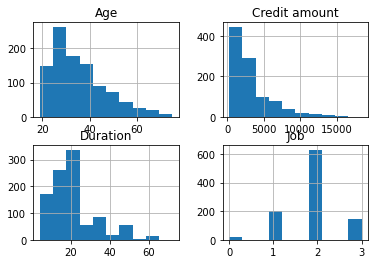

In [16]:
data[numeric_data].hist()

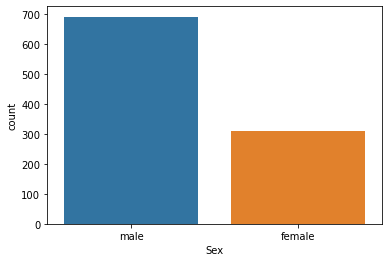

In [17]:
import seaborn as sns
sns.countplot(data['Sex'])

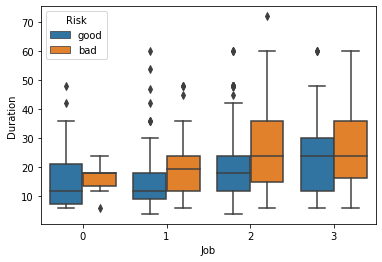

In [22]:
sns.boxplot(x="Job", y="Duration", hue="Risk", data=data)

In [23]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [27]:
data.isna().any()

Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts      True
Checking account     True
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [29]:
data_encoded = pd.get_dummies(data)
data_encoded.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,0,67,2,1169,6,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,22,2,5951,48,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2,49,1,2096,12,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,3,45,2,7882,42,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,53,2,4870,24,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [30]:
data_mod = data_encoded.loc[:, data_encoded.columns != 'Risk_bad']


In [32]:
mat_values = corr_matrix["Risk_good"].sort_values(ascending=False)
mat_values

Risk_good                      1.000000
Housing_own                    0.134589
Purpose_radio/TV               0.106922
Age                            0.091127
Saving accounts_rich           0.085749
Sex_male                       0.075493
Saving accounts_quite rich     0.070954
Checking account_rich          0.044009
Purpose_domestic appliances   -0.008016
Purpose_repairs               -0.020828
Purpose_furniture/equipment   -0.020971
Saving accounts_moderate      -0.022255
Purpose_car                   -0.022621
Purpose_vacation/others       -0.028058
Job                           -0.032735
Unnamed: 0                    -0.034606
Purpose_business              -0.036129
Purpose_education             -0.049085
Sex_female                    -0.075493
Housing_free                  -0.081556
Housing_rent                  -0.092785
Checking account_moderate     -0.119581
Credit amount                 -0.154739
Saving accounts_little        -0.161007
Duration                      -0.214927


In [33]:
cor_target = abs(corr_matrix["Risk_good"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

Credit amount                0.154739
Duration                     0.214927
Housing_own                  0.134589
Saving accounts_little       0.161007
Checking account_little      0.258333
Checking account_moderate    0.119581
Purpose_radio/TV             0.106922
Risk_good                    1.000000
Name: Risk_good, dtype: float64

In [45]:
attributes_new = ['Credit amount', 'Duration', 'Housing_own','Saving accounts_little', 'Checking account_little', 'Checking account_moderate', 'Purpose_radio/TV']
x_new = data_mod[attributes_new]
y_new = data_mod['Risk_good']

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_new)
x_scaled = scaler.transform(x_new)

In [48]:
x_scaled_dataframe

,Credit amount,Duration,Housing_own,Saving accounts_little,Checking account_little,Checking account_moderate,Purpose_radio/TV
0,-0.745131,-1.236478,0.634448,-1.232433,1.627770,-0.606621,1.603567
1,0.949817,2.248194,0.634448,0.811403,-0.614337,1.648476,1.603567
2,-0.416562,-0.738668,0.634448,0.811403,-0.614337,-0.606621,-0.623610
3,1.634247,1.750384,-1.576173,0.811403,1.627770,-0.606621,-0.623610
4,0.566664,0.256953,-1.576173,0.811403,1.627770,-0.606621,-0.623610
...,...,...,...,...,...,...,...
995,-0.544162,-0.738668,0.634448,0.811403,-0.614337,-0.606621,-0.623610
996,0.207612,0.754763,0.634448,0.811403,1.627770,-0.606621,-0.623610
997,-0.874503,-0.738668,0.634448,0.811403,-0.614337,-0.606621,1.603567
998,-0.505528,1.999289,-1.576173,0.811403,1.627770,-0.606621,1.603567


In [49]:
y_new

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk_good, Length: 1000, dtype: uint8

In [50]:
x = x_scaled_dataframe
y = y_new

In [51]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x,y)

from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x,y)

from sklearn.neighbors import KNeighborsClassifier
clf_neighbors = KNeighborsClassifier()
clf_neighbors.fit(x,y)

from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression()
clf_lg.fit(x,y)

LogisticRegression()

In [52]:
from sklearn.model_selection import cross_val_score
#Naive Bayes
print(cross_val_score(clf_gnb, x,y, cv = 3, scoring = "accuracy"))

#Decision Tree
print(cross_val_score(clf_tree, x,y, cv = 3, scoring = "accuracy"))

#KNeighbours
print(cross_val_score(clf_neighbors, x,y, cv = 3, scoring = "accuracy"))

#Logistic Regression
print(cross_val_score(clf_lg, x,y, cv = 3, scoring = "accuracy"))

[0.7005988  0.69069069 0.76276276]
[0.67365269 0.65465465 0.65765766]
[0.68862275 0.72372372 0.71171171]
[0.70958084 0.72972973 0.75675676]


In [53]:
from sklearn.model_selection import cross_val_predict

clf_gnb_pred = cross_val_predict(clf_gnb, x, y ,cv = 3)
clf_tree_pred = cross_val_predict(clf_tree, x, y ,cv = 3)
clf_neighbors_pred = cross_val_predict(clf_neighbors, x, y ,cv = 3)
clf_lg_pred = cross_val_predict(clf_lg, x, y ,cv = 3)

In [54]:
from sklearn.metrics import confusion_matrix
#Naive Bayes
print(confusion_matrix(y, clf_gnb_pred))

#Decision Tree
print(confusion_matrix(y, clf_tree_pred))

#KNN
print(confusion_matrix(y, clf_neighbors_pred))

#Logistic Regression
print(confusion_matrix(y, clf_lg_pred))

[[113 187]
 [ 95 605]]
[[139 161]
 [179 521]]
[[112 188]
 [104 596]]
[[102 198]
 [ 70 630]]


In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Naive Bayes
print("Precision Score:", precision_score(y, clf_gnb_pred))
print("Recall Score: ", recall_score(y, clf_gnb_pred))
print("F1 Score:", f1_score(y, clf_gnb_pred))

#Decision Tree
print("Precision Score:", precision_score(y, clf_tree_pred))
print("Recall Score: ", recall_score(y, clf_tree_pred))
print("F1 Score:", f1_score(y, clf_tree_pred))

#KNeighbors
print("Precision Score:", precision_score(y, clf_neighbors_pred))
print("Recall Score: ", recall_score(y, clf_neighbors_pred))
print("F1 Score:", f1_score(y, clf_neighbors_pred))

#Logistic Regression
print("Precision Score:", precision_score(y, clf_lg_pred))
print("Recall Score: ", recall_score(y, clf_lg_pred))
print("F1 Score:", f1_score(y, clf_lg_pred))

Precision Score: 0.7638888888888888
Recall Score:  0.8642857142857143
F1 Score: 0.8109919571045576
Precision Score: 0.7639296187683284
Recall Score:  0.7442857142857143
F1 Score: 0.7539797395079594
Precision Score: 0.7602040816326531
Recall Score:  0.8514285714285714
F1 Score: 0.8032345013477089
Precision Score: 0.7608695652173914
Recall Score:  0.9
F1 Score: 0.824607329842932


References - 

    1.https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
    2.https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b